In [1]:
#importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading data 
data = pd.read_csv('queue_system.csv')

In [3]:
data.head()

,id,queue_id,service_id,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,...,updated_at.3,id.4,name.3,email.1,email_verified_at,password,remember_token,created_at.4,updated_at.4,image
0,28.0,45.0,1.0,2.0,2.0,W,1.0,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,...,2024-01-23 10:29:32,2.0,Nandu Acharaya,nanda.acharya@pathao.com,NaN,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,NaN,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...
1,29.0,46.0,1.0,2.0,2.0,W,2.0,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,...,2024-01-23 10:29:32,2.0,Nandu Acharaya,nanda.acharya@pathao.com,NaN,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,NaN,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...
2,30.0,48.0,2.0,2.0,2.0,NR,1.0,2024-01-25,2024-01-25 18:34:53,NaN,...,2024-01-23 10:34:26,2.0,Nandu Acharaya,nanda.acharya@pathao.com,NaN,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,NaN,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...
3,31.0,47.0,1.0,2.0,2.0,W,3.0,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,...,2024-01-23 10:29:32,2.0,Nandu Acharaya,nanda.acharya@pathao.com,NaN,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,NaN,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...
4,32.0,50.0,3.0,3.0,2.0,T,1.0,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,...,2024-01-23 10:31:10,2.0,Nandu Acharaya,nanda.acharya@pathao.com,NaN,$2y$10$Z0yt.rVs3CaSJuncPtxUAuECePoSGeegLNzW6mu...,NaN,2024-01-23 10:16:45,2024-01-23 18:46:14,profile/SrVxywZEcODMdL4r1sjekFsRgv5bXIPnwQfVdS...


In [4]:
#viewing data columns
data.columns

Index(['id', 'queue_id', 'service_id', 'counter_id', 'user_id', 'token_letter',
       'token_number', 'called_date', 'started_at', 'ended_at', 'waiting_time',
       'served_time', 'turn_around_time', 'created_at', 'updated_at',
       'call_status_id', 'id.1', 'name', 'status', 'created_at.1',
       'updated_at.1', 'id.2', 'service_id.1', 'number', 'called',
       'reference_no', 'letter', 'name.1', 'email', 'phone', 'position',
       'created_at.2', 'updated_at.2', 'id.3', 'name.2', 'letter.1',
       'start_number', 'status.1', 'sms_enabled', 'optin_message_enabled',
       'call_message_enabled', 'noshow_message_enabled',
       'completed_message_enabled', 'status_message_enabled',
       'optin_message_format', 'call_message_format', 'noshow_message_format',
       'completed_message_format', 'status_message_format',
       'status_message_positions', 'ask_name', 'name_required', 'ask_email',
       'email_required', 'ask_phone', 'phone_required', 'created_at.3',
       'upda

# Data Preparations

#### Now extracting the relevant columns from the data

In [5]:
# selecting the columns which are relevant for analysis

df = data[['token_number', 'called_date', 'started_at', 'ended_at', 'waiting_time',
       'served_time', 'turn_around_time', 'created_at', 'updated_at','name', 'created_at.1',
       'updated_at.1', 'number', 'called','created_at.2', 'updated_at.2','name.2','created_at.3',
       'updated_at.3','name.3','created_at.4', 'updated_at.4']]

In [6]:
# changing columns name to remove redundant columns name
df.columns = ['call_token_number', 'called_date', 'started_at','ended_at', 'waiting_time', 'served_time', 'turn_around_time','call_created_at',
              'call_updated_at', 'counter_name', 'counter_created_at', 'counter_updated_at', 'queue_number','queue_called','queue_created_at',
              'queue_updated_at','service_name', 'service_created_at','service_updated_at','username','user_created_at','user_updated_at']

In [7]:
# the head of data
df.head()

,call_token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,call_created_at,call_updated_at,counter_name,...,queue_number,queue_called,queue_created_at,queue_updated_at,service_name,service_created_at,service_updated_at,username,user_created_at,user_updated_at
0,1.0,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,00:06:45,00:08:01,00:14:46,2024-01-25 18:34:01,2024-01-25 18:34:14,Counter 2,...,1.0,1.0,2024-01-25 18:19:28,2024-01-25 18:26:13,WIS (W),2024-01-23 10:29:32,2024-01-23 10:29:32,Nandu Acharaya,2024-01-23 10:16:45,2024-01-23 18:46:14
1,2.0,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,00:13:39,00:00:08,00:13:47,2024-01-25 18:34:16,2024-01-25 18:34:24,Counter 2,...,2.0,1.0,2024-01-25 18:20:37,2024-01-25 18:34:16,WIS (W),2024-01-23 10:29:32,2024-01-23 10:29:32,Nandu Acharaya,2024-01-23 10:16:45,2024-01-23 18:46:14
2,1.0,2024-01-25,2024-01-25 18:34:53,NaN,00:00:13,NaN,NaN,2024-01-25 18:34:53,2024-01-25 18:34:53,Counter 2,...,1.0,1.0,2024-01-25 18:34:40,2024-01-25 18:34:53,NEW REGISTRATION (NR),2024-01-23 10:30:10,2024-01-23 10:34:26,Nandu Acharaya,2024-01-23 10:16:45,2024-01-23 18:46:14
3,3.0,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,00:10:17,00:00:04,00:10:21,2024-01-25 18:35:14,2024-01-25 18:35:18,Counter 2,...,3.0,1.0,2024-01-25 18:24:57,2024-01-25 18:35:14,WIS (W),2024-01-23 10:29:32,2024-01-23 10:29:32,Nandu Acharaya,2024-01-23 10:16:45,2024-01-23 18:46:14
4,1.0,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,00:00:29,00:01:02,00:01:31,2024-01-25 18:35:58,2024-01-25 18:37:00,Counter 3,...,1.0,1.0,2024-01-25 18:35:29,2024-01-25 18:35:58,TRAINING (T),2024-01-23 10:31:10,2024-01-23 10:31:10,Nandu Acharaya,2024-01-23 10:16:45,2024-01-23 18:46:14


In [8]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   call_token_number   3354 non-null   float64
 1   called_date         3354 non-null   object 
 2   started_at          3354 non-null   object 
 3   ended_at            3335 non-null   object 
 4   waiting_time        3354 non-null   object 
 5   served_time         2737 non-null   object 
 6   turn_around_time    2737 non-null   object 
 7   call_created_at     3354 non-null   object 
 8   call_updated_at     3354 non-null   object 
 9   counter_name        3354 non-null   object 
 10  counter_created_at  3354 non-null   object 
 11  counter_updated_at  3354 non-null   object 
 12  queue_number        3375 non-null   float64
 13  queue_called        3375 non-null   float64
 14  queue_created_at    3375 non-null   object 
 15  queue_updated_at    3375 non-null   object 
 16  servic

# outlier detection 

In [9]:
#function to detect ouliers using quatile 
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

### before detectiong outliers convertign date_time obj into timestamp int dtype

In [10]:
# copying df to new_df, so there will be no changes on df data
new_df = df.copy()

In [11]:
# function to convert the datetime into timestamp int dtype to find the outliers in data
def timestamp_int(series):
    series = pd.to_datetime(series)
    return series.view(np.int64) // 10**9

In [12]:
# columns of new_df 
new_df.columns

Index(['call_token_number', 'called_date', 'started_at', 'ended_at',
       'waiting_time', 'served_time', 'turn_around_time', 'call_created_at',
       'call_updated_at', 'counter_name', 'counter_created_at',
       'counter_updated_at', 'queue_number', 'queue_called',
       'queue_created_at', 'queue_updated_at', 'service_name',
       'service_created_at', 'service_updated_at', 'username',
       'user_created_at', 'user_updated_at'],
      dtype='object')

In [13]:
# columns name which have datetime dtype
cols_datetype = ['called_date', 'started_at', 'ended_at','waiting_time', 'served_time', 'turn_around_time', 'call_created_at',
               'call_updated_at','counter_created_at','counter_updated_at','queue_created_at', 'queue_updated_at',
               'service_created_at', 'service_updated_at','user_created_at', 'user_updated_at']


# converting columns dtype into timestamp int dtype
for col in cols_datetype:
    if col in new_df.columns:
        new_df[col] = timestamp_int(new_df[col])

C:\Users\User\AppData\Local\Temp\ipykernel_18240\3760368543.py:4: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return series.view(np.int64) // 10**9
C:\Users\User\AppData\Local\Temp\ipykernel_18240\3760368543.py:4: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return series.view(np.int64) // 10**9
C:\Users\User\AppData\Local\Temp\ipykernel_18240\3760368543.py:4: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return series.view(np.int64) // 10**9
C:\Users\User\AppData\Local\Temp\ipykernel_18240\3760368543.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.to_datetim

In [14]:
# information of new_data
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   call_token_number   3354 non-null   float64
 1   called_date         3377 non-null   int64  
 2   started_at          3377 non-null   int64  
 3   ended_at            3377 non-null   int64  
 4   waiting_time        3377 non-null   int64  
 5   served_time         3377 non-null   int64  
 6   turn_around_time    3377 non-null   int64  
 7   call_created_at     3377 non-null   int64  
 8   call_updated_at     3377 non-null   int64  
 9   counter_name        3354 non-null   object 
 10  counter_created_at  3377 non-null   int64  
 11  counter_updated_at  3377 non-null   int64  
 12  queue_number        3375 non-null   float64
 13  queue_called        3375 non-null   float64
 14  queue_created_at    3377 non-null   int64  
 15  queue_updated_at    3377 non-null   int64  
 16  servic

In [15]:
# getting unique value of called_date
new_df['called_date'].unique()

array([ 1706140800,  1706227200,  1706400000,  1706486400,  1706572800,
        1706659200,  1706745600,  1706832000,  1707004800,  1707091200,
        1707177600,  1707264000,  1707350400,  1707436800,  1707609600,
        1707696000,  1707782400,  1707868800,  1707955200,  1708041600,
       -9223372037], dtype=int64)

In [16]:
# columns with dtype int and float
new_df.select_dtypes(include = ['int64','float64']).columns

Index(['call_token_number', 'called_date', 'started_at', 'ended_at',
       'waiting_time', 'served_time', 'turn_around_time', 'call_created_at',
       'call_updated_at', 'counter_created_at', 'counter_updated_at',
       'queue_number', 'queue_called', 'queue_created_at', 'queue_updated_at',
       'service_created_at', 'service_updated_at', 'user_created_at',
       'user_updated_at'],
      dtype='object')

In [17]:
# getting the columns with numeric value
changing_columns = new_df.select_dtypes(include = ['int64','float64']).columns

In [18]:
changing_columns

Index(['call_token_number', 'called_date', 'started_at', 'ended_at',
       'waiting_time', 'served_time', 'turn_around_time', 'call_created_at',
       'call_updated_at', 'counter_created_at', 'counter_updated_at',
       'queue_number', 'queue_called', 'queue_created_at', 'queue_updated_at',
       'service_created_at', 'service_updated_at', 'user_created_at',
       'user_updated_at'],
      dtype='object')

In [19]:
# using numeric columns to detect the outliers
outliers_dict = {} # dict to store ouliers

for cols in changing_columns:
    outlier = detect_outliers(new_df, cols)
    outliers_dict[cols] = outlier

In [20]:
# printing the outliers on each numeric features
for cols, outlier in outliers_dict.items():
    print(f'outlier of {cols}')
    print(outlier)

outlier of call_token_number
Empty DataFrame
Columns: [call_token_number, called_date, started_at, ended_at, waiting_time, served_time, turn_around_time, call_created_at, call_updated_at, counter_name, counter_created_at, counter_updated_at, queue_number, queue_called, queue_created_at, queue_updated_at, service_name, service_created_at, service_updated_at, username, user_created_at, user_updated_at]
Index: []

[0 rows x 22 columns]
outlier of called_date
      call_token_number  called_date  started_at    ended_at  waiting_time  \
3354                NaN  -9223372037 -9223372037 -9223372037   -9223372037   
3355                NaN  -9223372037 -9223372037 -9223372037   -9223372037   
3356                NaN  -9223372037 -9223372037 -9223372037   -9223372037   
3357                NaN  -9223372037 -9223372037 -9223372037   -9223372037   
3358                NaN  -9223372037 -9223372037 -9223372037   -9223372037   
3359                NaN  -9223372037 -9223372037 -9223372037   -92233720

In [21]:
# function to remove outliers from data
def remove_outliers(data,feature):
    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_df  = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return cleaned_df

In [22]:
# removing outiers 
for cols in changing_columns:
    new_df = remove_outliers(new_df, cols)

In [23]:
#new clean data information
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1639 entries, 9 to 3350
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   call_token_number   1639 non-null   float64
 1   called_date         1639 non-null   int64  
 2   started_at          1639 non-null   int64  
 3   ended_at            1639 non-null   int64  
 4   waiting_time        1639 non-null   int64  
 5   served_time         1639 non-null   int64  
 6   turn_around_time    1639 non-null   int64  
 7   call_created_at     1639 non-null   int64  
 8   call_updated_at     1639 non-null   int64  
 9   counter_name        1639 non-null   object 
 10  counter_created_at  1639 non-null   int64  
 11  counter_updated_at  1639 non-null   int64  
 12  queue_number        1639 non-null   float64
 13  queue_called        1639 non-null   float64
 14  queue_created_at    1639 non-null   int64  
 15  queue_updated_at    1639 non-null   int64  
 16  service_nam

In [24]:
# there is no null value on clean data
new_df.isnull().sum()

call_token_number     0
called_date           0
started_at            0
ended_at              0
waiting_time          0
served_time           0
turn_around_time      0
call_created_at       0
call_updated_at       0
counter_name          0
counter_created_at    0
counter_updated_at    0
queue_number          0
queue_called          0
queue_created_at      0
queue_updated_at      0
service_name          0
service_created_at    0
service_updated_at    0
username              0
user_created_at       0
user_updated_at       0
dtype: int64

In [25]:
new_df.head()

,call_token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,call_created_at,call_updated_at,counter_name,...,queue_number,queue_called,queue_created_at,queue_updated_at,service_name,service_created_at,service_updated_at,username,user_created_at,user_updated_at
9,1.0,1706227200,1706263614,1706264439,1722127933,1722125625,1722128758,1706264426,1706264439,Counter 3,...,1.0,1.0,1706260481,1706263614,NEW REGISTRATION (NR),1706005810,1706006066,Chhiring Ghale,1706035273,1706208904
10,1.0,1706227200,1706264483,1706264486,1722126919,1722124803,1722126922,1706264483,1706264486,Counter 2,...,1.0,1.0,1706262364,1706264483,WIS (W),1706005772,1706005772,Suyog Tamang,1706035412,1706035412
11,2.0,1706227200,1706264488,1706264490,1722126886,1722124802,1722126888,1706264488,1706264490,Counter 2,...,2.0,1.0,1706262402,1706264488,WIS (W),1706005772,1706005772,Suyog Tamang,1706035412,1706035412
12,3.0,1706227200,1706264492,1706264495,1722126745,1722124803,1722126748,1706264492,1706264495,Counter 2,...,3.0,1.0,1706262547,1706264492,WIS (W),1706005772,1706005772,Suyog Tamang,1706035412,1706035412
13,4.0,1706227200,1706264497,1706264499,1722126088,1722124802,1722126090,1706264497,1706264499,Counter 2,...,4.0,1.0,1706263209,1706264497,WIS (W),1706005772,1706005772,Suyog Tamang,1706035412,1706035412


## Statistic Description of numeric values

In [26]:
#description of numetic value of data
new_df.describe()

,call_token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,call_created_at,call_updated_at,counter_created_at,counter_updated_at,queue_number,queue_called,queue_created_at,queue_updated_at,service_created_at,service_updated_at,user_created_at,user_updated_at
count,1639.000000,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1639.000000,1639.0,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03
mean,42.688835,1.707246e+09,1.707297e+09,1.707297e+09,1.722129e+09,1.722125e+09,1.722129e+09,1.707297e+09,1.707297e+09,1.706015e+09,1.706015e+09,42.688835,1.0,1.707293e+09,1.707297e+09,1.706006e+09,1.706006e+09,1.706035e+09,1.706064e+09
std,27.185018,5.621581e+05,5.619691e+05,5.619744e+05,2.772433e+03,3.664524e+02,2.828512e+03,5.619673e+05,5.619744e+05,1.394416e+04,1.394416e+04,27.185018,0.0,5.625600e+05,5.619691e+05,1.892920e+01,1.464522e+02,1.177324e+02,6.462340e+04
min,1.000000,1.706227e+09,1.706264e+09,1.706264e+09,1.722125e+09,1.722125e+09,1.722125e+09,1.706264e+09,1.706264e+09,1.706006e+09,1.706006e+09,1.000000,1.0,1.706260e+09,1.706264e+09,1.706006e+09,1.706006e+09,1.706035e+09,1.706035e+09
25%,19.000000,1.706746e+09,1.706787e+09,1.706788e+09,1.722126e+09,1.722125e+09,1.722127e+09,1.706787e+09,1.706788e+09,1.706006e+09,1.706006e+09,19.000000,1.0,1.706785e+09,1.706787e+09,1.706006e+09,1.706006e+09,1.706035e+09,1.706035e+09
50%,41.000000,1.707264e+09,1.707326e+09,1.707327e+09,1.722128e+09,1.722125e+09,1.722129e+09,1.707326e+09,1.707327e+09,1.706006e+09,1.706006e+09,41.000000,1.0,1.707317e+09,1.707326e+09,1.706006e+09,1.706006e+09,1.706035e+09,1.706035e+09
75%,63.000000,1.707782e+09,1.707831e+09,1.707832e+09,1.722131e+09,1.722126e+09,1.722131e+09,1.707831e+09,1.707832e+09,1.706036e+09,1.706036e+09,63.000000,1.0,1.707827e+09,1.707831e+09,1.706006e+09,1.706006e+09,1.706035e+09,1.706035e+09
max,114.000000,1.708042e+09,1.708105e+09,1.708106e+09,1.722137e+09,1.722127e+09,1.722138e+09,1.708105e+09,1.708106e+09,1.706036e+09,1.706036e+09,114.000000,1.0,1.708102e+09,1.708105e+09,1.706006e+09,1.706006e+09,1.706035e+09,1.706209e+09


In [27]:
# seting the option in pandas to get the actual float value instead to scientific notation value
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# the mean, quartile, and standard deviation of waiting_time, turn_around_time and served_tiem
new_df[['waiting_time','turn_around_time','served_time']].describe()

,waiting_time,turn_around_time,served_time
count,1639.000,1639.000,1639.000
mean,1722128800.452,1722129430.531,1722125430.079
std,2772.433,2828.512,366.452
min,1722124800.000,1722124946.000,1722124801.000
25%,1722126400.500,1722127050.500,1722125159.500
50%,1722128419.000,1722129044.000,1722125435.000
75%,1722130653.000,1722131283.500,1722125651.000
max,1722136992.000,1722137678.000,1722126633.000


In [28]:
# first mode value of waiting_time, served_tiem and turn_around_time
new_df[['waiting_time','turn_around_time','served_time']].mode().iloc[0]

waiting_time       1722124997.000
turn_around_time   1722126842.000
served_time        1722124802.000
Name: 0, dtype: float64

In [29]:
#description of waiting_time, turn_aroun_time and served_time
df[['waiting_time','turn_around_time','served_time']].describe()

,waiting_time,turn_around_time,served_time
count,3354,2737,2737
unique,2794,2399,1269
top,00:26:21,00:35:38,00:00:02
freq,7,4,29


In [30]:
# the frequently time taken for waiting, turn_around and to serve
df[['waiting_time','turn_around_time','served_time']].mode().iloc[0]

waiting_time        00:26:21
turn_around_time    00:35:38
served_time         00:00:02
Name: 0, dtype: object

In [31]:
#getting the neumeric values only
numeric_data = new_df.drop(['service_name','counter_name','username'],axis=1)

Numeric Values

In [32]:
numeric_data

,call_token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,call_created_at,call_updated_at,counter_created_at,counter_updated_at,queue_number,queue_called,queue_created_at,queue_updated_at,service_created_at,service_updated_at,user_created_at,user_updated_at
9,1.000,1706227200,1706263614,1706264439,1722127933,1722125625,1722128758,1706264426,1706264439,1706005770,1706005770,1.000,1.000,1706260481,1706263614,1706005810,1706006066,1706035273,1706208904
10,1.000,1706227200,1706264483,1706264486,1722126919,1722124803,1722126922,1706264483,1706264486,1706005764,1706005764,1.000,1.000,1706262364,1706264483,1706005772,1706005772,1706035412,1706035412
11,2.000,1706227200,1706264488,1706264490,1722126886,1722124802,1722126888,1706264488,1706264490,1706005764,1706005764,2.000,1.000,1706262402,1706264488,1706005772,1706005772,1706035412,1706035412
12,3.000,1706227200,1706264492,1706264495,1722126745,1722124803,1722126748,1706264492,1706264495,1706005764,1706005764,3.000,1.000,1706262547,1706264492,1706005772,1706005772,1706035412,1706035412
13,4.000,1706227200,1706264497,1706264499,1722126088,1722124802,1722126090,1706264497,1706264499,1706005764,1706005764,4.000,1.000,1706263209,1706264497,1706005772,1706005772,1706035412,1706035412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,85.000,1708041600,1708103064,1708103973,1722128738,1722125709,1722129647,1708103064,1708103973,1706005774,1706005774,85.000,1.000,1708099126,1708103064,1706005810,1706006066,1706035388,1706035388
3346,87.000,1708041600,1708103437,1708104296,1722128759,1722125659,1722129618,1708103437,1708104296,1706035821,1706035821,87.000,1.000,1708099478,1708103437,1706005810,1706006066,1706035317,1706035317
3347,88.000,1708041600,1708103594,1708104610,1722128397,1722125816,1722129413,1708103594,1708104610,1706005764,1706005764,88.000,1.000,1708099997,1708103594,1706005810,1706006066,1706035412,1706035412
3349,90.000,1708041600,1708104433,1708105991,1722127585,1722126358,1722129143,1708104433,1708105991,1706035821,1706035821,90.000,1.000,1708101648,1708104433,1706005810,1706006066,1706035317,1706035317


## Correlation between the numeric data

In [33]:
# getting the correlation between each numeric features
corr_data = numeric_data.corr()

In [34]:
corr_data.head()

,call_token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,call_created_at,call_updated_at,counter_created_at,counter_updated_at,queue_number,queue_called,queue_created_at,queue_updated_at,service_created_at,service_updated_at,user_created_at,user_updated_at
call_token_number,1.000,0.074,0.087,0.087,0.420,-0.047,0.406,0.087,0.087,-0.027,-0.027,1.000,NaN,0.085,0.087,-0.029,-0.029,-0.136,0.047
called_date,0.074,1.000,1.000,1.000,-0.221,0.014,-0.215,1.000,1.000,-0.079,-0.079,0.074,NaN,1.000,1.000,-0.056,-0.056,-0.070,-0.101
started_at,0.087,1.000,1.000,1.000,-0.211,0.014,-0.205,1.000,1.000,-0.079,-0.079,0.087,NaN,1.000,1.000,-0.053,-0.053,-0.072,-0.101
ended_at,0.087,1.000,1.000,1.000,-0.211,0.015,-0.205,1.000,1.000,-0.078,-0.078,0.087,NaN,1.000,1.000,-0.052,-0.052,-0.072,-0.101
waiting_time,0.420,-0.221,-0.211,-0.211,1.000,0.088,0.992,-0.211,-0.211,0.106,0.106,0.420,NaN,-0.215,-0.211,0.286,0.286,-0.059,0.031


<Axes: >

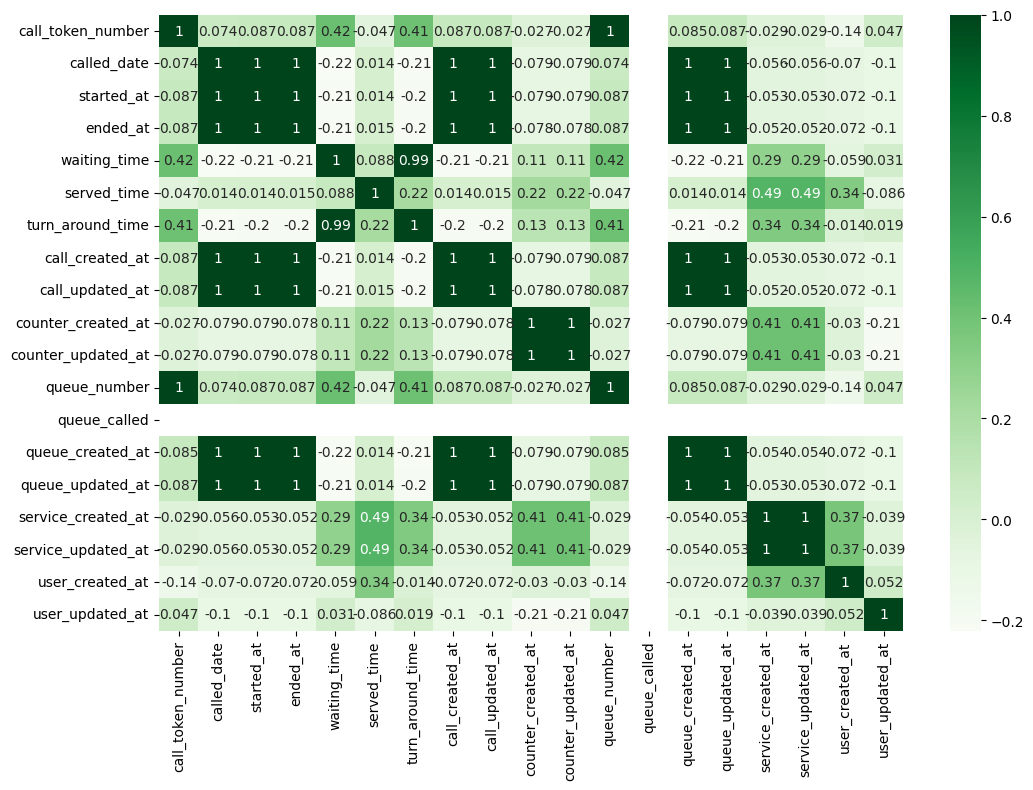

In [35]:
# ploting the correlation data into heatmap for visualization
plt.figure(figsize = (12,8))
sns.heatmap(corr_data, cmap = 'Greens', annot = True)

### The correlation Explanation
1. Highly positively correlated columns:
   
            a. called_date, call_started_at, call_ended_at are highly correlated with corr_value 1
            b. call_created_at and call_updated_at are also highly correlated with corr_value 1
            c. queue_created_at and queue_updated_at are also highly correlated with corr_value 1
            d. service_created_at and service_updated_at are also highly correlated with corr_value 1

    It suggest that update has happened at the same time when the all, queue and service was created.

            e. waiting_time and and turn_around_time

    It suggest that waiting time highly contribute turn_aroun_time

            f. call_token_number and queue_number: it suggest unique the call_token_number is assigned to each unique queue_number.

3. Positive correlation:
   
            a. call_token_number is positively correlated to waiting time and turn_around_time, it suggest that less token_number,
                lesser the waiting time and turn_around_time

5. Negative correlation:
   
            a. waiting_time and turn_around_tiem : is negatively correlated with the call_created and updated, and queue created and updated time

7. Independent feature:
   
            a. queue_called is independent feature, which is not correlated with any features.


# Visualization of data

In [36]:
new_df.head()

,call_token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,call_created_at,call_updated_at,counter_name,...,queue_number,queue_called,queue_created_at,queue_updated_at,service_name,service_created_at,service_updated_at,username,user_created_at,user_updated_at
9,1.000,1706227200,1706263614,1706264439,1722127933,1722125625,1722128758,1706264426,1706264439,Counter 3,...,1.000,1.000,1706260481,1706263614,NEW REGISTRATION (NR),1706005810,1706006066,Chhiring Ghale,1706035273,1706208904
10,1.000,1706227200,1706264483,1706264486,1722126919,1722124803,1722126922,1706264483,1706264486,Counter 2,...,1.000,1.000,1706262364,1706264483,WIS (W),1706005772,1706005772,Suyog Tamang,1706035412,1706035412
11,2.000,1706227200,1706264488,1706264490,1722126886,1722124802,1722126888,1706264488,1706264490,Counter 2,...,2.000,1.000,1706262402,1706264488,WIS (W),1706005772,1706005772,Suyog Tamang,1706035412,1706035412
12,3.000,1706227200,1706264492,1706264495,1722126745,1722124803,1722126748,1706264492,1706264495,Counter 2,...,3.000,1.000,1706262547,1706264492,WIS (W),1706005772,1706005772,Suyog Tamang,1706035412,1706035412
13,4.000,1706227200,1706264497,1706264499,1722126088,1722124802,1722126090,1706264497,1706264499,Counter 2,...,4.000,1.000,1706263209,1706264497,WIS (W),1706005772,1706005772,Suyog Tamang,1706035412,1706035412


<Axes: xlabel='counter_name', ylabel='served_time'>

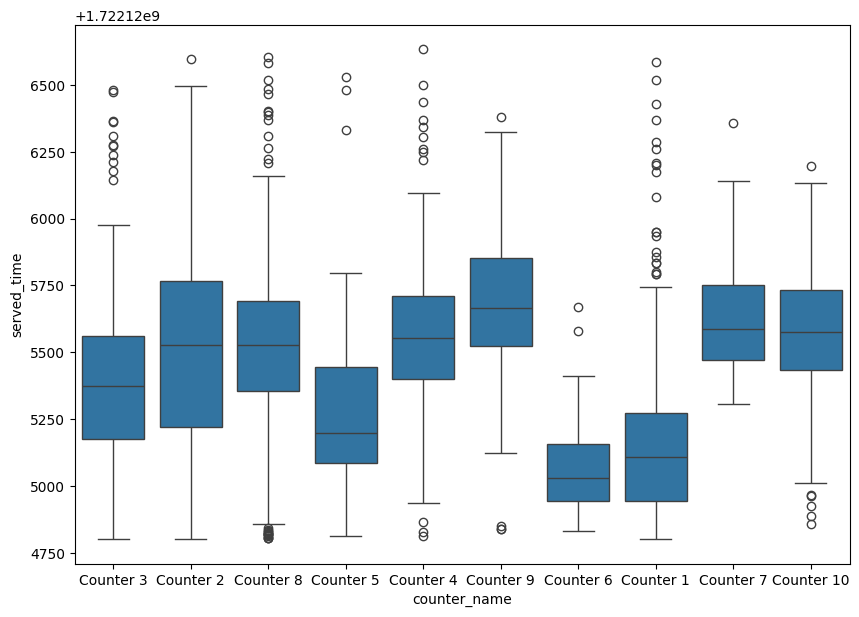

In [37]:
#boxplot for visualization of served_time and counter_name relaiton
plt.figure(figsize=(10,7))
sns.boxplot(y = 'served_time', x ='counter_name',data=new_df)

### Insights

1. Comparatively, Counter 6 have lesser served_time, where as Counter 2 has longest served time
2. Counter 2, Counter 8 and Counter 4 have a same median serve_time
3. Counter 2 and 8 have variable length of served_time
4. Counter 6, 1 and 5 have lesser served time than other counters

<Axes: xlabel='counter_name', ylabel='waiting_time'>

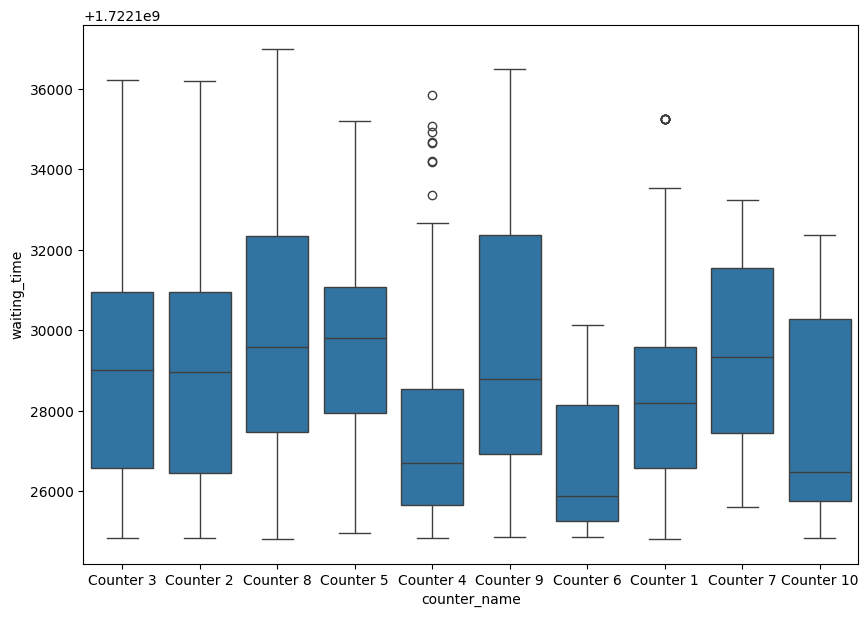

In [38]:
# boxplot to visualize waiting time of each counter
plt.figure(figsize=(10,7))
sns.boxplot(y = 'waiting_time', x ='counter_name',data=new_df)

### Insights
1. Here the counter 2, 3, 8, 9 has a higher waiting time 
2. Where as counter 6 , 4, 10 has a lower waiting time

<Axes: xlabel='counter_name', ylabel='turn_around_time'>

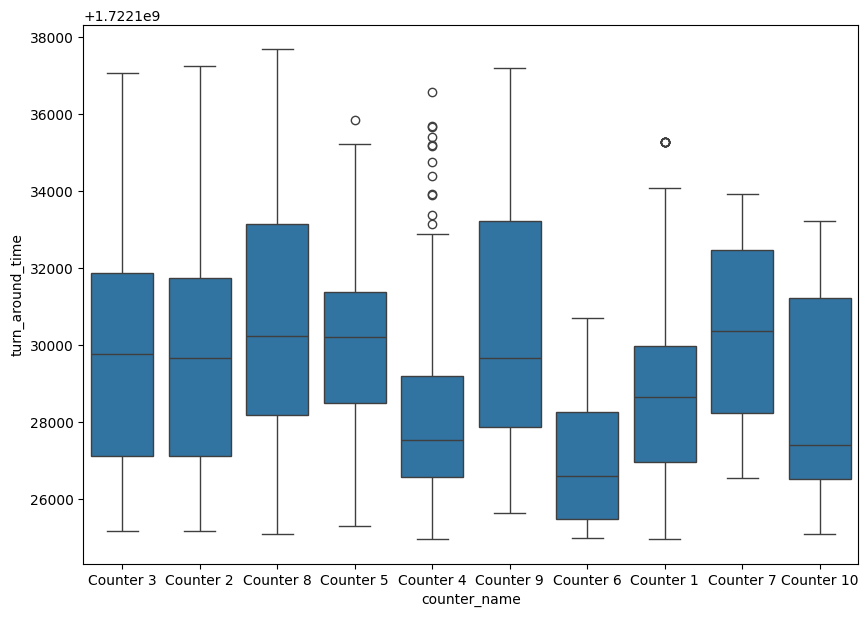

In [39]:
# boxplot to visualize turn_around_time of each counter
plt.figure(figsize=(10,7))
sns.boxplot(y = 'turn_around_time', x ='counter_name',data=new_df)

<Axes: xlabel='service_name', ylabel='count'>

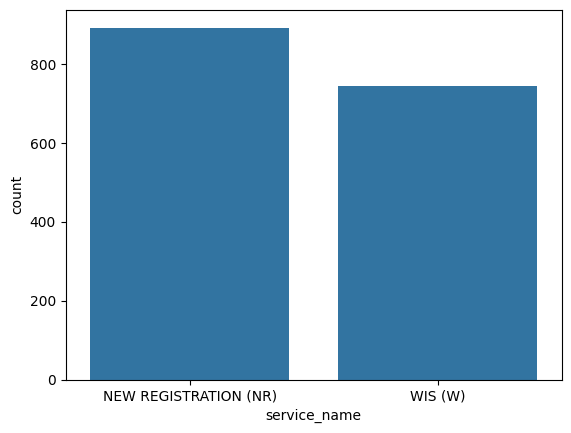

In [40]:
# countplot of service names
sns.countplot(data = new_df, x = 'service_name')

Comparatively service New Registration have a higher count than WIS service

<Axes: xlabel='counter_name', ylabel='turn_around_time'>

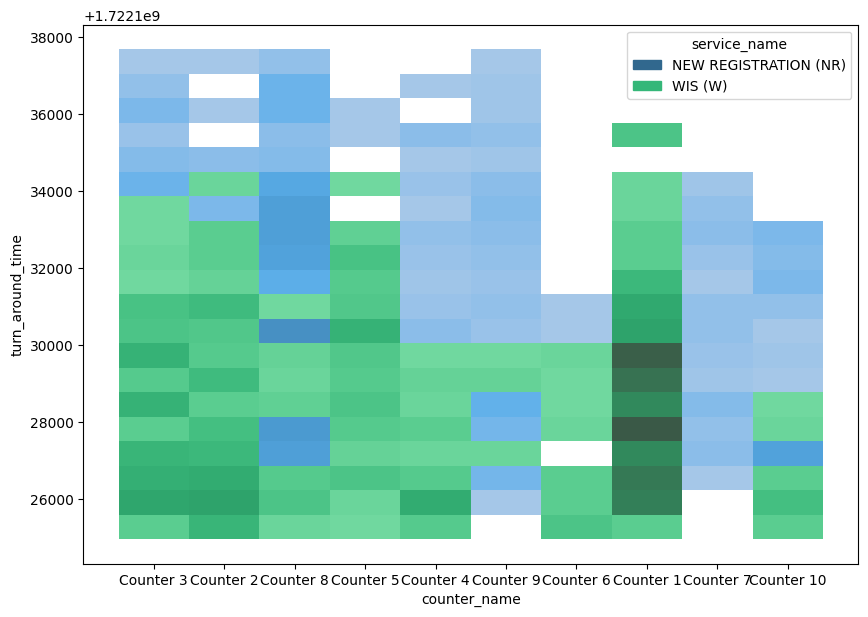

In [41]:
# histplot to visualize turn_around_time of each counter with hue service name
plt.figure(figsize= (10,7))
sns.histplot(data = new_df, x = 'counter_name', y='turn_around_time', kde = True, bins = 20,hue = 'service_name',palette= 'viridis')

### Insights
1. Counter 6 and 10 have lesser turn_around time where in contrast Counter 2,3,8 and 9 has higher turn_around_time
2. The turn_aroung_time taken for service (WIS) is less then time taken for service (New Registration)

In [42]:
# unique username on data
new_df['username'].unique()

array(['Chhiring Ghale', 'Suyog Tamang', 'Prem Jaishi', 'Sagar Magar',
       'Jyoti BK', 'Lokendra Sunar', 'Mahima Kalikote'], dtype=object)

In [43]:
# the frequet visitor with value_count
new_df['username'].value_counts()

username
Mahima Kalikote    324
Chhiring Ghale     272
Suyog Tamang       266
Lokendra Sunar     260
Prem Jaishi        225
Jyoti BK           199
Sagar Magar         93
Name: count, dtype: int64

The user 'Mahima Kalikote' had use the service most and the user 'Sagar Magar' had used ther servies les

<Axes: xlabel='username', ylabel='count'>

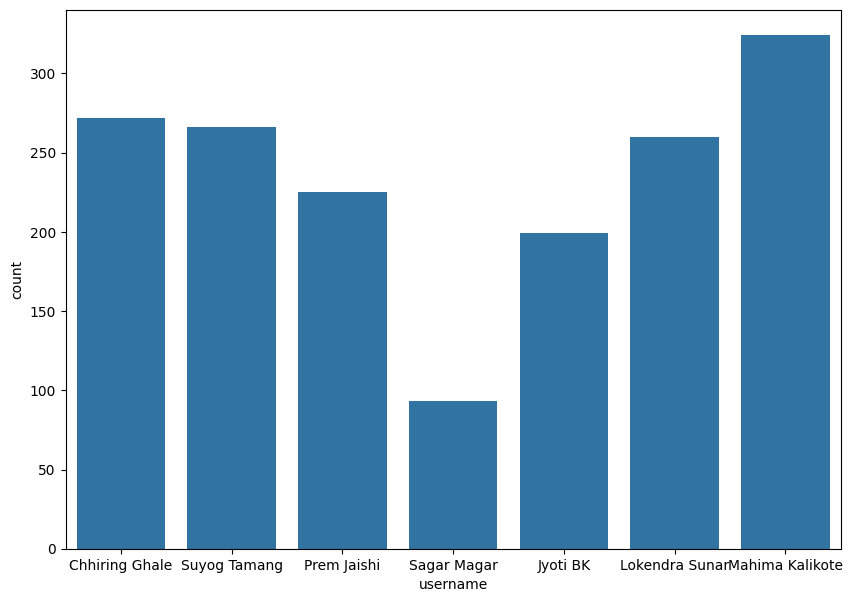

In [44]:
# the visited number of users
plt.figure(figsize=(10,7))
sns.countplot(data = new_df, x = 'username')

In [45]:
#getting the number of customer served w.r.t service_created_at time
customers_served = df['service_created_at'].value_counts().sort_index()
customers_served

service_created_at
2024-01-23 10:29:32    1585
2024-01-23 10:30:10    1529
2024-01-23 10:31:10     240
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Customers Served on each Service Created  Date')

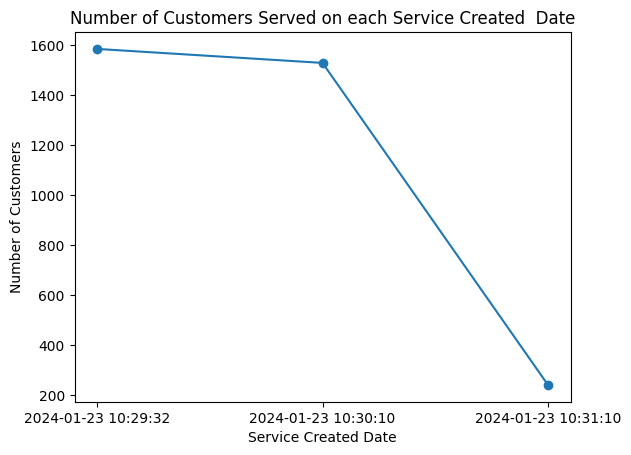

In [46]:
# ploting the customer served on each service created date
plt.plot(customers_served.index, customers_served.values, marker='o', linestyle='-')
plt.xlabel('Service Created Date')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Served on each Service Created  Date')

In [47]:
# number of calls on each called date
calls_number = df['called_date'].value_counts().sort_index()
calls_number

called_date
2024-01-25      8
2024-01-26    129
2024-01-28    216
2024-01-29    134
2024-01-30    179
2024-01-31    150
2024-02-01    178
2024-02-02     39
2024-02-04    218
2024-02-05    152
2024-02-06    194
2024-02-07    168
2024-02-08    204
2024-02-09    188
2024-02-11    205
2024-02-12    205
2024-02-13    187
2024-02-14    179
2024-02-15    202
2024-02-16    219
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Calls on each Called Date')

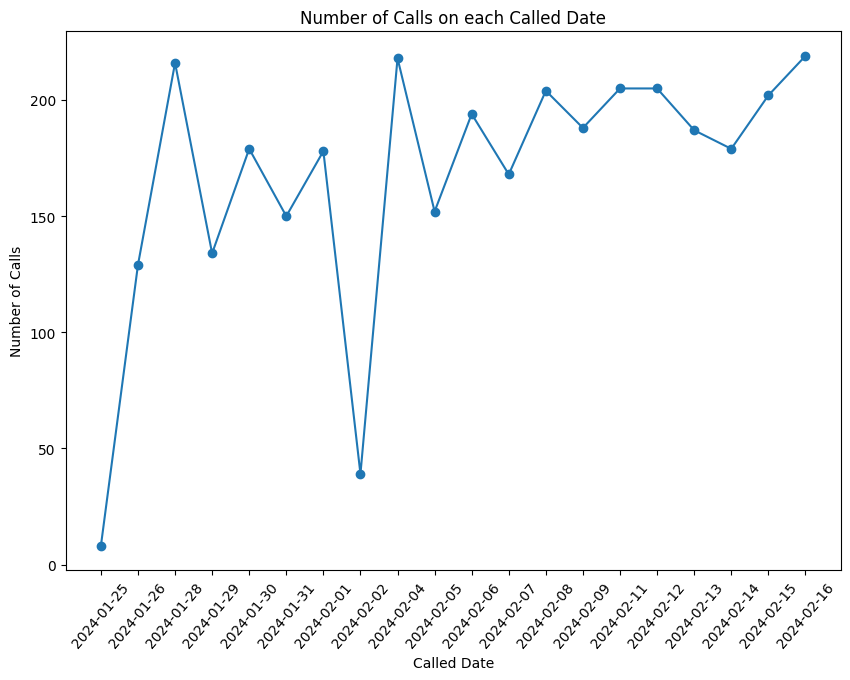

In [48]:
#ploting graph for visualization of number on calls on each called date
plt.figure(figsize=(10,7))
plt.plot(calls_number.index, calls_number.values, marker='o', linestyle='-')
plt.xlabel('Called Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation = 50)
plt.title('Number of Calls on each Called Date')

In [49]:
# converting waiting time to timestamp to count tha average waiting time
df['new_waiting_time'] = timestamp_int(df['waiting_time'])

C:\Users\User\AppData\Local\Temp\ipykernel_18240\3760368543.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.to_datetime(series)
C:\Users\User\AppData\Local\Temp\ipykernel_18240\3760368543.py:4: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return series.view(np.int64) // 10**9
C:\Users\User\AppData\Local\Temp\ipykernel_18240\1444496296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_waiting_time'] = timestamp_int(df['waiting_time'])


In [50]:
# getting the mean of waiting_time on each called date
avg_waiting = df.groupby('called_date')['new_waiting_time'].mean()

In [51]:
#printign ave_waiting time
avg_waiting

called_date
2024-01-25   1722125550.750
2024-01-26   1722130205.155
2024-01-28   1722129821.787
2024-01-29   1722129943.373
2024-01-30   1722131274.112
2024-01-31   1722128831.033
2024-02-01   1722128691.152
2024-02-02   1722125532.128
2024-02-04   1722128172.179
2024-02-05   1722129768.921
2024-02-06   1722130601.639
2024-02-07   1722131500.982
2024-02-08   1722129040.358
2024-02-09   1722128659.899
2024-02-11   1722126468.815
2024-02-12   1722126527.044
2024-02-13   1722129501.690
2024-02-14   1722128868.955
2024-02-15   1722128013.436
2024-02-16   1722128761.333
Name: new_waiting_time, dtype: float64

Text(0.5, 1.0, 'Average waiting time per day')

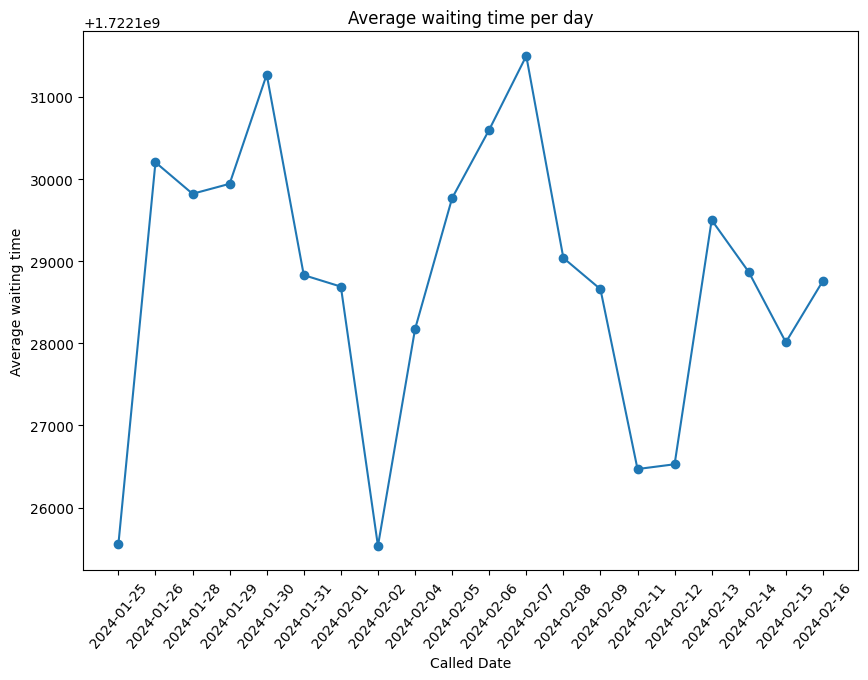

In [52]:
# ploting line graph to visualize average waiting time on each called date
plt.figure(figsize=(10,7))
plt.plot(avg_waiting.index, avg_waiting.values, marker='o', linestyle='-')
plt.xlabel('Called Date')
plt.ylabel('Average waiting time')
plt.xticks(rotation = 50)
plt.title('Average waiting time per day')

In [53]:
# converting turn_around_time to timestamp int dtype
df['new_turn_around_time'] = timestamp_int(df['turn_around_time'])

C:\Users\User\AppData\Local\Temp\ipykernel_18240\3760368543.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.to_datetime(series)
C:\Users\User\AppData\Local\Temp\ipykernel_18240\3760368543.py:4: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return series.view(np.int64) // 10**9
C:\Users\User\AppData\Local\Temp\ipykernel_18240\3774767123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_turn_around_time'] = timestamp_int(df['turn_around_time'])


Text(0.5, 1.0, 'Average Turn Around time per day')

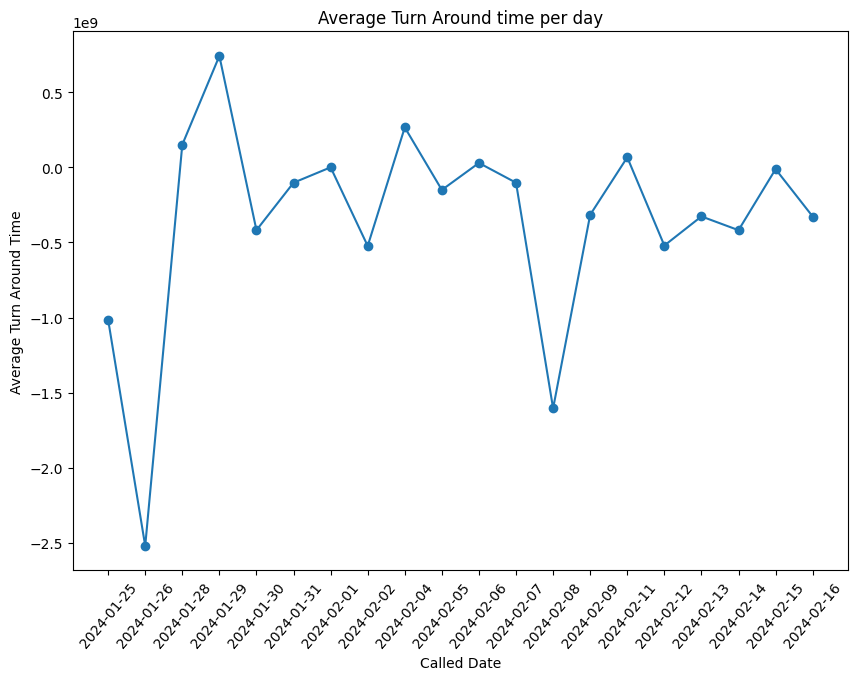

In [54]:
# getting the average turn_around_time and ploting 
avg_turn_aroun_time = df.groupby('called_date')['new_turn_around_time'].mean()

plt.figure(figsize=(10,7))
plt.plot(avg_turn_aroun_time.index, avg_turn_aroun_time.values, marker='o', linestyle='-')
plt.xlabel('Called Date')
plt.ylabel('Average Turn Around Time')
plt.xticks(rotation = 50)
plt.title('Average Turn Around time per day')

The (-) value of turn around time is unusual so it could be anomalies

In [55]:
# converting started_at time to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])

C:\Users\User\AppData\Local\Temp\ipykernel_18240\1006391501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['started_at'] = pd.to_datetime(df['started_at'])


In [56]:
# getting the hour from  started_at time
df['started_hour'] = df['started_at'].dt.hour

C:\Users\User\AppData\Local\Temp\ipykernel_18240\241025584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['started_hour'] = df['started_at'].dt.hour


In [57]:
df['started_hour']

0      18.000
1      18.000
2      18.000
3      18.000
4      18.000
        ...  
3372      NaN
3373      NaN
3374      NaN
3375      NaN
3376      NaN
Name: started_hour, Length: 3377, dtype: float64

In [58]:
# getting the peak hour of calls
df.groupby('called_date')['started_hour'].value_counts().sort_values(ascending = False).head(10)

called_date  started_hour
2024-02-04   13.000          45
2024-02-12   14.000          42
2024-02-16   14.000          42
             13.000          42
2024-02-11   13.000          41
2024-02-07   17.000          38
2024-02-11   14.000          38
2024-02-16   15.000          38
2024-01-28   16.000          37
2024-02-12   12.000          36
Name: count, dtype: int64

### So, the peak hour is between 1 pm and 5pm